From gym/README.rst 
==========

* There are two basic concepts in reinforcement learning: the environment (namely, the outside world) and the agent (namely, the algorithm you are writing). The agent sends actions to the environment, and the environment replies with observations and rewards (that is, a score).

* The core gym interface is Env, which is the unified environment interface. There is no interface for agents; that part is left to you. The following are the Env methods you should know:

  * reset(self): Reset the environment's state. Returns observation.
  * step(self, action): Step the environment by one timestep. Returns observation, reward, done, info.
  * render(self, mode='human', close=False): Render one frame of the environment. The default mode will do something human friendly, such as pop up a window. Passing the close flag signals the renderer to close any such windows.

From ALE manual:
========

* The action space consists of both Player A and Player B’s actions (see Section 7.1 for details). In general, Player B’s action may safely be set to noop (18) but it should be left out altogether if the restricted_action_set option is set to true.

* Available Actions: The following regular actions are defined in common/Constants.h and interpreted by ALE:
  * noop (0)  fire (1)  up (2)  right (3)  left (4) 
  * down (5)  up-right (6)  up-left (7)  down-right (8)  down-left (9)
  * up-fire (10)  right-fire (11)  left-fire (12)  down-fire (13)  up-right-fire (14)
  * up-left-fire (15)  down-right-fire (16)  down-left-fire (17)  reset* (40)

* Note that the reset (40) action toggles the Atari 2600 switch, rather than reset the environment, and as such is ignored by most interfaces. The shared library, CTypes, and fifo interfaces provide methods for properly resetting the environment.

* Player B’s actions are defined to be 18 + the equivalent action value for Player A. For example, Player B’s up action is up (20). In addition to the regular ALE actions, the following (somewhat deprecated) actions are also processed by the FIFO interfaces:

* The observation space depends on whether the send_rgb option is enabled. When enabled, the observation space consists of 100,928 integers: first the 128 bytes of RAM (taking values in 0–255), followed by 100,800 bytes describing the screen. Each pixel is described by three bytes, taking values in 0–255, specifying the pixel’s red, green and blue components in that order. The screen is provided in row-order, beginning with the 160 pixels that compose the first row. If send_rgb is disabled (this is the default), the observation space consists of 33,728 integers: first the 128 bytes of RAM, then the 33,600 screen pixels (in NTSC format; values in 0–127). These pixels are also provided in row order.



In [1]:
import gym

In [101]:
breakout = gym.make('Breakout-v0')

[2017-04-14 16:11:00,448] Making new env: Breakout-v0


In [5]:
breakout.metadata

{'render.modes': ['human', 'rgb_array']}

In [6]:
repr(breakout)

'<TimeLimit<AtariEnv<Breakout-v0>>>'

In [7]:
repr(breakout.env)

'<gym.envs.atari.atari_env.AtariEnv object at 0x7f5617cce208>'

In [3]:
breakout.env.__init__(game='breakout', obs_type='image', frameskip=1, repeat_action_probability=0)

In [30]:
breakout.env._action_set

array([ 0,  1,  3,  4, 11, 12], dtype=int32)

In [102]:
initial_observation = breakout.reset()

In [32]:
initial_observation.shape

(210, 160, 3)

In [6]:
import numpy as np
from PIL import Image

In [7]:
img = Image.fromarray(initial_observation)

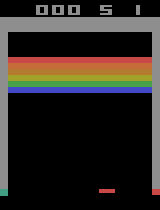

In [8]:
img

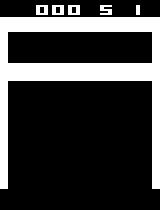

In [14]:
img.convert(mode='1', dither=Image.NONE)

In [16]:
def preprocess(observation, new_width=84, new_height=110, threshold=1):
    img = Image.fromarray(observation)
    # TODO: remove resizing/grayscaling/thresholding.
    img = img.convert('L')
    new_size = (new_width, new_height) 
    img = img.resize(new_size)
    
    obs = np.array(img)
    
    obs[obs < threshold] = 0
    obs[obs >= threshold] = 255
    obs = obs[-new_width:, :]
    return obs

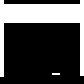

In [17]:
Image.fromarray(preprocess(initial_observation))

In [18]:
obs = preprocess(initial_observation)

In [19]:
breakout.action_space

Discrete(6)

In [20]:
atari_action = {
    0: 'noop',
    1: 'fire',
    2: 'up',
    3: 'right',
    4: 'left',
    5: 'down',
    11: 'right-fire',
    12: 'left-fire',
}

In [21]:
for i, action_value in enumerate(breakout.env._action_set):
    print('{}: {}'.format(i, atari_action[breakout.env._action_set[i]]))

0: noop
1: fire
2: right
3: left
4: right-fire
5: left-fire


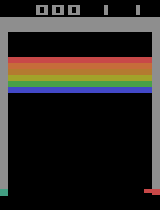

In [182]:
observation, reward, done, info = breakout.step(0)
Image.fromarray(observation)

In [183]:
info, done

({'ale.lives': 0}, True)

In [178]:
import random
steps = 0
breakout.reset()
observation, reward, done, info = breakout.step(0)
lives = info['ale.lives']
while done or steps < 400:
    observation, reward, done, info = breakout.step(random.randint(1, 2))
    steps += 1

KeyboardInterrupt: 

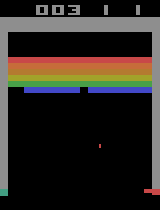

In [177]:
Image.fromarray(observation)

In [10]:
breakout.render()

In [102]:
_ = breakout.step(0)

In [108]:
reward, done, info

(0.0, False, {'ale.lives': 5})

In [2]:
type(10 ** 6)

int